In [1]:
#Plant Disease Recognition using CNN

In [2]:
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical

Using Theano backend.


In [3]:
#initialising the model

In [4]:
model = Sequential()

In [5]:
#adding layers to the model

In [6]:
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(38, activation='softmax'))

In [7]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)         590080    
__________

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory('train/crowdai/',
                                                 target_size = (32,32),
                                                 batch_size = 650,
                                                 class_mode = 'categorical')

test_set = train_datagen.flow_from_directory('test/crowdai/',
                                                 target_size = (32,32),
                                                 batch_size = 650,
                                                 class_mode = 'categorical')

Found 16350 images belonging to 38 classes.
Found 5564 images belonging to 38 classes.


In [11]:
training = model.fit_generator(training_set,
                        steps_per_epoch =24,
                        nb_epoch = 25,
                        validation_data=test_set,
                        validation_steps = 5564/650,
                        callbacks = [EarlyStopping(min_delta=0.001, patience=3)])

/home/shuja1497/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=24, epochs=25, callbacks=[<keras.ca..., validation_steps=8)`
  


Epoch 1/25
24/24 [==============================] - 534s - loss: 3.4675 - acc: 0.1038 - val_loss: 3.4210 - val_acc: 0.1885
Epoch 2/25
24/24 [==============================] - 271s - loss: 3.2973 - acc: 0.1601 - val_loss: 3.1476 - val_acc: 0.1944
Epoch 3/25
24/24 [==============================] - 287s - loss: 3.0382 - acc: 0.1973 - val_loss: 2.9476 - val_acc: 0.2194
Epoch 4/25
24/24 [==============================] - 277s - loss: 2.9000 - acc: 0.2215 - val_loss: 2.8372 - val_acc: 0.2490
Epoch 5/25
24/24 [==============================] - 265s - loss: 2.7399 - acc: 0.2644 - val_loss: 2.6100 - val_acc: 0.2998
Epoch 6/25
24/24 [==============================] - 263s - loss: 2.5144 - acc: 0.3100 - val_loss: 2.3205 - val_acc: 0.3592
Epoch 7/25
24/24 [==============================] - 258s - loss: 2.3062 - acc: 0.3642 - val_loss: 2.1827 - val_acc: 0.3902
Epoch 8/25
24/24 [==============================] - 264s - loss: 2.1485 - acc: 0.4024 - val_loss: 1.9939 - val_acc: 0.4342
Epoch 9/25
24/24

In [12]:
from keras.models import save_model

In [13]:
model.save("plantdisease_withVal_allepoch64.h5")

In [14]:
historydata = training.history

In [15]:
historydata

{'acc': [0.1038461538652579,
  0.16152824015910444,
  0.19720930212557911,
  0.21980066478648455,
  0.26458471835253644,
  0.31102989787279173,
  0.36159468410023027,
  0.39966777303686174,
  0.43295680872625686,
  0.46046511883355457,
  0.47813953711740992,
  0.50564784088800119,
  0.52697674519199866,
  0.54993589222431183,
  0.56252491018700834,
  0.59096345711388065,
  0.60013288972385703,
  0.61501661665811891,
  0.62651163161394996,
  0.64093023241556368,
  0.64418604999681639,
  0.65548172939655391,
  0.66358803673043998,
  0.66631229474298981,
  0.67295680945101766],
 'loss': [3.4675377508004508,
  3.2944862398990367,
  3.0378113482085571,
  2.9013238452201664,
  2.7381552216222516,
  2.5071048839543746,
  2.3097032193725688,
  2.1560478939170458,
  2.0061330272509807,
  1.8891424158482852,
  1.8058362506156744,
  1.6978592413208413,
  1.624898758837551,
  1.5369840363661449,
  1.4845317938795122,
  1.3977713802724185,
  1.3585110340403559,
  1.311563285086242,
  1.259066653014

In [16]:
import matplotlib.pyplot as plt

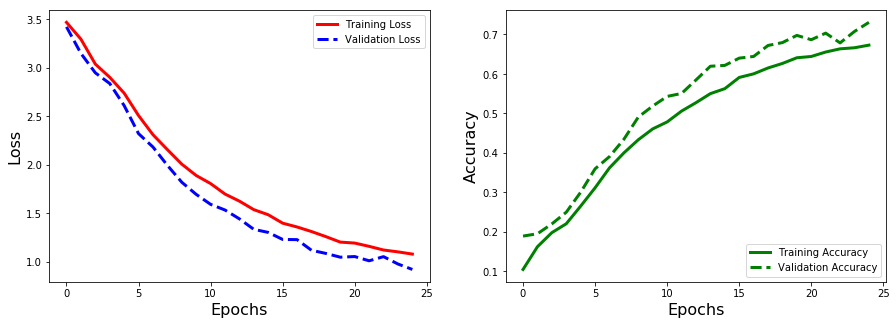

In [19]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=16) 
 
plt.plot(historydata['loss'], 'r', label='Training Loss', linewidth=3) 
plt.plot(historydata['val_loss'], 'b--', label='Validation Loss', linewidth=3) 
plt.legend(loc='upper right') 
 
plt.subplot(1, 2, 2) 
plt.ylabel('Accuracy', fontsize=16) 
plt.xlabel('Epochs', fontsize=16) 
plt.plot(historydata['acc'], 'g', label='Training Accuracy' , linewidth=3) 
plt.plot(historydata['val_acc'], 'g--', label='Validation Accuracy' , linewidth=3)


plt.legend(loc='lower right') 
plt.show() 
fig.savefig('graphsForLeafModelFINAL.png')

In [20]:
label_map = (training_set.class_indices)
print(label_map)

{'c_24': 17, 'c_25': 18, 'c_26': 19, 'c_27': 20, 'c_20': 13, 'c_21': 14, 'c_22': 15, 'c_23': 16, 'c_28': 21, 'c_29': 22, 'c_1': 1, 'c_0': 0, 'c_3': 23, 'c_2': 12, 'c_5': 33, 'c_4': 32, 'c_7': 35, 'c_6': 34, 'c_9': 37, 'c_33': 27, 'c_32': 26, 'c_37': 31, 'c_36': 30, 'c_35': 29, 'c_34': 28, 'c_19': 11, 'c_18': 10, 'c_31': 25, 'c_30': 24, 'c_15': 7, 'c_14': 6, 'c_17': 9, 'c_16': 8, 'c_11': 3, 'c_10': 2, 'c_13': 5, 'c_12': 4, 'c_8': 36}


In [21]:
#testing for a single image 
from keras.preprocessing import image as image_utils 
import numpy as np

test_image = image_utils.load_img(r'D:\Users\Yash\Desktop\p2\Image Dataset\testing image\1.jpg', target_size=(32, 32)) 
test_image = image_utils.img_to_array(test_image) 
test_image = np.expand_dims(test_image, axis=0) 
result = model.predict_on_batch(test_image) 
 
 

IOError: [Errno 2] No such file or directory: 'D:\\Users\\Yash\\Desktop\\p2\\Image Dataset\\testing image\\1.jpg'

In [22]:
print(result)

NameError: name 'result' is not defined

In [ ]:
print(list(label_map.keys())[list(label_map.values()).index(np.argmax(result))])

In [53]:
test_image = image_utils.load_img(r'D:\Users\Yash\Desktop\p2\Image Dataset\crowdai - Copy\train\c_18\0c2392f6-3e69-4baf-b9f3-197623f6631a___JR_B.Spot 3176.jpg', target_size=(32, 32)) 
test_image = image_utils.img_to_array(test_image) 
test_image = np.expand_dims(test_image, axis=0) 
result = model.predict_on_batch(test_image) 
 

In [54]:
print(list(label_map.keys())[list(label_map.values()).index(np.argmax(result))])

c_19


In [ ]:
from keras.models import load_model
model = load_model(r"D:\Users\Yash\Desktop\Image Dataset\new image\plantdisease_withVal_allepoch32.h5")